In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [3]:
df = pd.read_csv('bike_data_combined.csv', low_memory=False)

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,month,day,hour
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.256460,4861,Subscriber,No,NaN,Jan,Thursday,17:57
1,65900,2019-01-31 20:58:33.886,2019-02-01 15:16:54.173,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,134.0,Valencia St at 24th St,37.752428,-122.420628,5506,Subscriber,No,NaN,Jan,Thursday,20:58
2,62633,2019-01-31 18:06:52.924,2019-02-01 11:30:46.530,245.0,Downtown Berkeley BART,37.870139,-122.268422,157.0,65th St at Hollis St,37.846784,-122.291376,2717,Customer,No,NaN,Jan,Thursday,18:06
3,44680,2019-01-31 19:46:09.719,2019-02-01 08:10:50.318,85.0,Church St at Duboce Ave,37.770083,-122.429156,53.0,Grove St at Divisadero,37.775946,-122.437777,4557,Customer,No,NaN,Jan,Thursday,19:46
4,60709,2019-01-31 14:19:01.541,2019-02-01 07:10:51.065,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,2100,Customer,No,NaN,Jan,Thursday,14:19


In [5]:
df.isnull().sum()
#since I am mainly working with days, month, duration and user types, so these null values wont impact my exploration.

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
month                            0
day                              0
hour                             0
dtype: int64

In [4]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df.dtypes


duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
bike_share_for_all_trip            object
rental_access_method               object
month                              object
day                                object
hour                               object
dtype: object

# UNIVARIATE EXPLORATION
Here I will check the general trend in bike uses, and first I will check individual factors.
## 1 Number of rides as per months
#### Lets check how months effect the use of bikes

In [35]:
month_counts = df.month.value_counts().values
month_counts
months = df.month.value_counts().index
months 

Index(['Jul', 'Mar', 'Oct', 'Apr', 'Sep', 'Aug', 'Jan', 'Jun', 'Nov', 'Feb',
       'May', 'Dec'],
      dtype='object')

Text(0.5, 1.05, 'Month-wise usage of bike sharing')

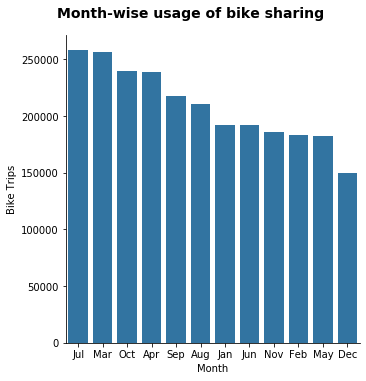

In [42]:
base_color = sb.color_palette()[0]
g = sb.catplot(data=df, x='month', kind='count', color = base_color, order = months)
g.set_axis_labels("Month", "Bike Trips")
g.fig.suptitle('Month-wise usage of bike sharing', y=1.05, fontsize=14, fontweight='semibold')

#### It can be seen that the bike use is highest in july and lowest in dec.
## 2 Number of rides as per days of week

In [8]:
days = df.day.value_counts().index
days

Index(['Tuesday', 'Thursday', 'Wednesday', 'Friday', 'Monday', 'Saturday',
       'Sunday'],
      dtype='object')

In [9]:
day_counts = df.day.value_counts().values
day_counts

array([427640, 424474, 414448, 397284, 396463, 234370, 212304])

Text(0.5, 1.05, 'Day-wise usage of bike sharing')

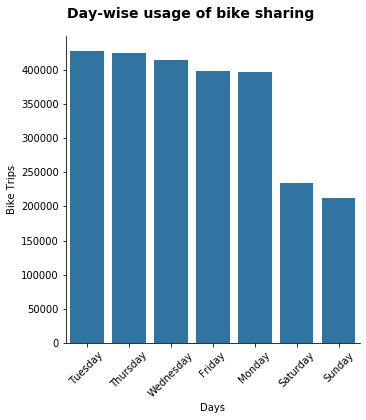

In [43]:
base_color = sb.color_palette()[0]
g = sb.catplot(data=df, x='day', kind='count', color = base_color, order = days)
g.set_axis_labels("Days", "Bike Trips")
plt.xticks(rotation = 45)
g.fig.suptitle('Day-wise usage of bike sharing', y=1.05, fontsize=14, fontweight='semibold')

#### It can be seen that the bike use is highest on Tuesdays and lowest on Sundays
## 3 Number of rides as per hours of the day

In [11]:
#lets take hour with hour and minutes
df['hour'] = pd.to_datetime(df['hour'], errors = 'coerce').dt.strftime('%H.%M')

In [12]:
df.hour.dtypes

dtype('O')

In [197]:
# letc check which time the bikes are in high demand.
time = list(df.hour)

In [198]:
#to plot the graph, we need to convert time from object to float
time_int = []
for t in time:
    time_int.append(float(t))


In [199]:
len(time_int)

2506982

(array([ 40716.,  12858., 106870.,  35229., 230823.,  47809., 189794.,
         26083.,  93429.,  16603.,  84079.,  19115.,  94983.,  19181.,
         93703.,  18024.,  90069.,  18088., 100083.,  24842., 154734.,
         38519., 250678.,  46153., 202251.,  31336., 126300.]),
 array([ 6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
        11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
        17. , 17.5, 18. , 18.5, 19. , 19.5]),
 <a list of 27 Patch objects>)

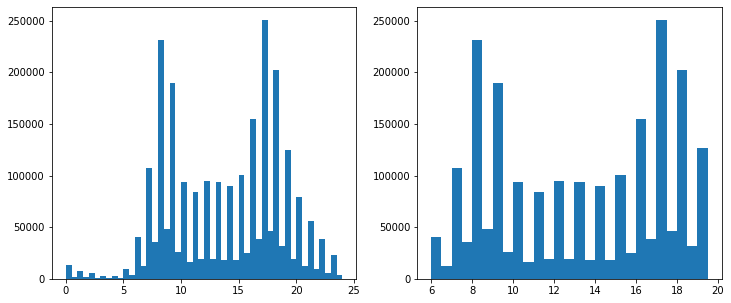

In [15]:
#this will tell about the time when bikes demand was highest.
import numpy as np
plt.figure(figsize = [12,5])

plt.subplot(1,2,1)
bin_edges = np.arange(0, 24.5, 0.5)
plt.hist(data = df, x = time_int, bins = bin_edges)

plt.subplot(1,2,2)
bin_edges = np.arange(6, 20, 0.5)
plt.hist(data = df, x = time_int, bins = bin_edges)

#### It can be seen that the use is highest between 7am to 10 am, and 16:00 to 20:00. 
## 4 Lets check combinations of 2 highly famous routes, top 20

In [16]:
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,month,day,hour
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.25646,4861,Subscriber,No,NaN,Jan,Thursday,17.57


In [18]:
#lets check which route is most common

In [19]:
station_pair = df.groupby(['start_station_name', 'end_station_name']).agg('count').sort_values('end_time', ascending = False).head(20)

In [20]:
# get list of top 20 station pairs
top_20_stations = list(station_pair.head(20).index)
top_20_stations_list = []

for n in top_20_stations:
    top_20_stations_list.append(":".join(n))
top_20_stations_list 

['San Francisco Ferry Building (Harry Bridges Plaza):The Embarcadero at Sansome St',
 'Berry St at 4th St:San Francisco Ferry Building (Harry Bridges Plaza)',
 'The Embarcadero at Sansome St:Steuart St at Market St',
 'Bryant St at 2nd St:Montgomery St BART Station (Market St at 2nd St)',
 'Grand Ave at Perkins St:19th Street BART Station',
 '19th Street BART Station:Grand Ave at Perkins St',
 'San Francisco Ferry Building (Harry Bridges Plaza):Berry St at 4th St',
 'The Embarcadero at Sansome St:San Francisco Ferry Building (Harry Bridges Plaza)',
 'Steuart St at Market St:Berry St at 4th St',
 'Market St at 10th St:Powell St BART Station (Market St at 4th St)',
 '2nd St at Townsend St:Montgomery St BART Station (Market St at 2nd St)',
 '2nd St at Townsend St:San Francisco Ferry Building (Harry Bridges Plaza)',
 'Steuart St at Market St:The Embarcadero at Sansome St',
 '5th St at Virginia St:San Fernando St at 7th St',
 'Berry St at 4th St:Howard St at Beale St',
 'Montgomery St BART 

In [21]:
top_20_stations_count = list(station_pair.head(20).duration_sec)
top_20_stations_count

[5091,
 4882,
 3841,
 3716,
 3699,
 3363,
 3218,
 3204,
 2993,
 2979,
 2976,
 2810,
 2784,
 2716,
 2696,
 2691,
 2558,
 2535,
 2528,
 2513]

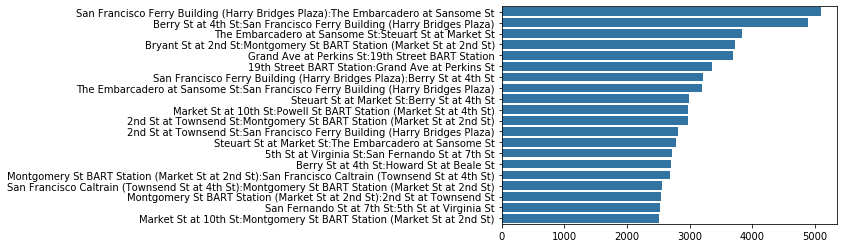

In [68]:
sb.barplot(y = top_20_stations_list, x = top_20_stations_count, orient = "h", color = base_color)

#### It can be seen that the San Francisco Ferry Building (Harry Bridges Plaza) to The Embarcadero at Sansome St is most busy route, it has 5091 total bikes.

## 5 Lets check the average bike usage time

In [52]:
#Lets create a new column with time in minutes, rounded to 2 digits.
df["duration_min"] = round((df.duration_sec/60), 2)
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,month,day,hour,duration_min
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.25646,4861,Subscriber,No,NaN,Jan,Thursday,17.57,1347.08


{'whiskers': [<matplotlib.lines.Line2D at 0x7efb93525750>,
 'caps': [<matplotlib.lines.Line2D at 0x7efb9352a210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efb9357df90>],
 'medians': [<matplotlib.lines.Line2D at 0x7efb9352ac50>],
 'fliers': [],
 'means': []}

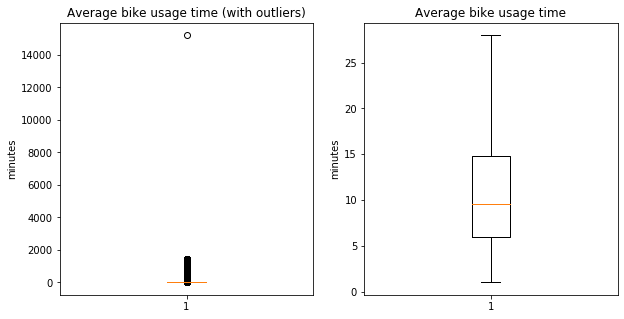

In [62]:
#bins = np.arange(0, df.duration_min.max()+50, 50)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title("Average bike usage time (with outliers)")
plt.ylabel("minutes")
plt.boxplot(data = df, x = 'duration_min')

plt.subplot(122)
plt.title("Average bike usage time")
plt.ylabel("minutes")
plt.boxplot(data = df, x = 'duration_min', showfliers = False)

#### The median lies around 8-9 min, with max bike time around 28 min and min around 2 min (outliers removed).

(array([120278., 507823., 541604., 428806., 298411., 197778., 125800.,
         79661.,  52099.,  36024.,  23052.,  16270.]),
 array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36]),
 <a list of 12 Patch objects>)

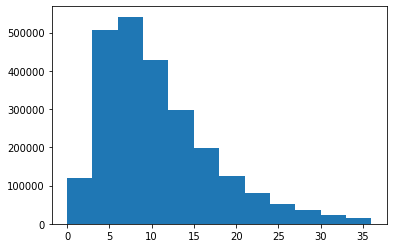

In [67]:
bin_edges = np.arange(0, 36+3, 3)
plt.hist(data = df, x = 'duration_min', bins = bin_edges)

#### It can be seen that the highest number of people bike for around 8-9min, and the histogram is right skewed.
## 6 Types of users

In [176]:
sorted_counts = df['user_type'].value_counts()
sizes = sorted_counts.values
total_users = df.shape[0]
proportion = []
for n in sizes:
    proportion.append(round(n*100/total_users, 2))
proportion


[80.62, 19.38]

Text(0.5, 1.05, 'Proportion of users')

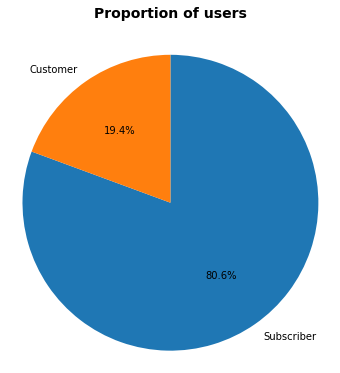

In [187]:
plt.figure(figsize=(10,6))
plt.pie(proportion, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct = '%1.1f%%');
plt.axis('square')
plt.title("Proportion of users", y=1.05, fontsize=14, fontweight='semibold')

#### It can be seen that the number of subscribers is almost 4 times more than that of customers
#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
In univariate analysis, I mainly focussed on number of rides according to hour of the day, months and days of week. I also founf that there are few stations between which thes rides are highest (probably because those lie on the office zones). The number of users are more as subscribers, than customers. The bike usage is highest in July/ March and least in December, and also its lowest on weekends. The distribution of bikes usage as per hour of the day depends on office houre mostly, with 2 peaks, showing bimodal distribution. 

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Yes, I extracted days, time and months from the timestamp to get better ideas of ride distribution accordingly. The time duration was given in seconds, which was converted to minutes. To check top 20 stations connects, groupby fiunction was used. Also while checking duration of bike rides, there were few outliers in boxplot, which were then removed by using showfliers function.

# BIVARIATE EXPLORATION
## 1 Biking time according to months

In [125]:
# Now we know that there is a point which is abruptly high, lets find that point and drop that row.
df[df.duration_min>1500]
df.drop(index = 2481276, inplace = True)

In [128]:
# confirming if that row is removed
df[df.duration_min>1500]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,month,day,hour,duration_min


In [129]:
duration_month = df.groupby('month')['duration_min'].mean().sort_values(ascending = False, ignore_index = False)
duration_month.index.tolist()

['Sep',
 'Jun',
 'Jul',
 'Aug',
 'Oct',
 'Mar',
 'Apr',
 'Nov',
 'May',
 'Dec',
 'Jan',
 'Feb']

Text(0.5, 1.05, 'Average ride duration per month')

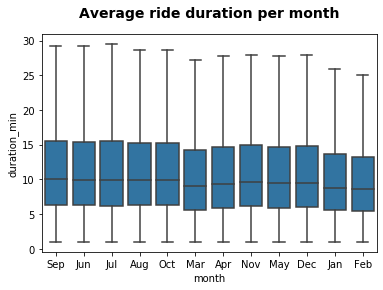

In [131]:
sb.boxplot(data = df, x = 'month', y = 'duration_min', color = base_color,showfliers = False, order = duration_month.index.tolist())
plt.title("Average ride duration per month", y=1.05, fontsize=14, fontweight='semibold')

#### It can be seen that the longer bike duration is high on average in september and lowest in february.
## 2 Biking time according to days

In [132]:
duration_day = df.groupby('day')['duration_min'].mean().sort_values(ascending = False, ignore_index = False)
duration_day.index.tolist()

['Saturday', 'Sunday', 'Friday', 'Monday', 'Thursday', 'Wednesday', 'Tuesday']

Text(0.5, 1.05, 'Average ride duration per day')

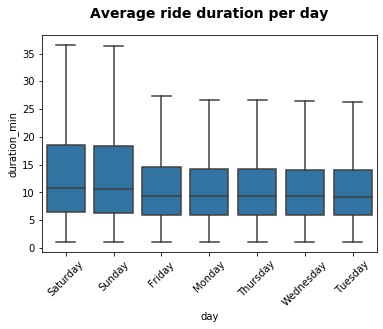

In [207]:
sb.boxplot(data = df, x = 'day', y = 'duration_min', color = base_color,showfliers = False, order = duration_day.index.tolist())
plt.xticks(rotation = 45)
plt.title("Average ride duration per day", y=1.05, fontsize=14, fontweight='semibold')

#### We see that average biking duration is high during weekends, as compared to weekdays.

## 3 Lets check types of users according to hour of the day

In [191]:
df.hour.dtypes

dtype('O')

In [206]:
#lets devide day in 4 parts as day_time
#peak_1 = 8-12
#low_1 = 12-16
#peak_2 = 16-20
#low_2 = 20-8
df.head(1)
day_time = []
#time_int was a list prepared before, with times as integer.
for time in time_int:
    if time>8 and time<=12:
        day_time.append('peak_1')
    elif time>12 and time<=16:
        day_time.append('low_1')
    elif time>16 and time<=20:
        day_time.append('peak_2')
    else:
        day_time.append('low_2')

len(day_time)

df['day_time'] = day_time
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method,month,day,hour,duration_min,day_time
0,80825,2019-01-31 17:57:44.613,2019-02-01 16:24:49.864,229.0,Foothill Blvd at 42nd Ave,37.775745,-122.213037,196.0,Grand Ave at Perkins St,37.808894,-122.25646,4861,Subscriber,No,NaN,Jan,Thursday,17.57,1347.08,peak_2


Text(0.5, 1.05, 'User type as per day time')

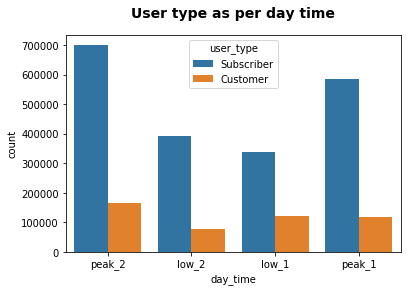

In [226]:
sb.countplot(data = df, x = 'day_time', hue = 'user_type')
plt.title("User type as per day time", y=1.05, fontsize=14, fontweight='semibold')

#### It can be seen that at all time of the day, number of subscribers is much higher than customers, with highest on peak 1 and peak 2.
## 4 Lets check types of users according to months

Text(0.5, 1.05, 'total user counts as per user type and month')

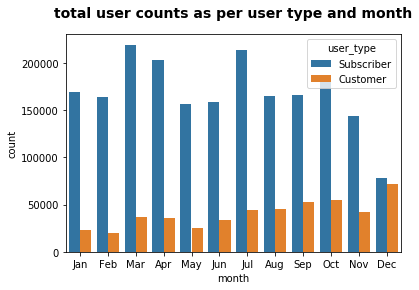

In [270]:
sb.countplot(data = df, x = 'month', hue = 'user_type')
plt.title("total user counts as per user type and month", y=1.05, fontsize=14, fontweight='semibold')

#### It can be seen that the number of customers are high during dec, sept and oct, while subscribers is high during mar, apr and july.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
In bivariate analysis, I mainly focussed on rides duration according to hour of the day, months and days of week. Surprisingly, eventhough the number of rides were least during weekends, the duration for the same was highest at that time. For months, duration was highest in Sept and least in Feb. Than I checked the type of users according to time of the day, it was found that subscribers were more at peak 1 and peak 2, same goes with months too, with highest in March and july. Surprisingly number of customers was high in December (almost equal to subscibers).

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Yes, I devided the day into 4 parts, peak 1 (8-12), peak 2(4-8pm), low 1(12-4pm) and low 2(8pm to 8 am). Also, number of customers was high in Dec, which was unusual for me.




# MULTIVARIATE EXPLORATION

## 1 Lets check bike rides duration according to users and months of year.

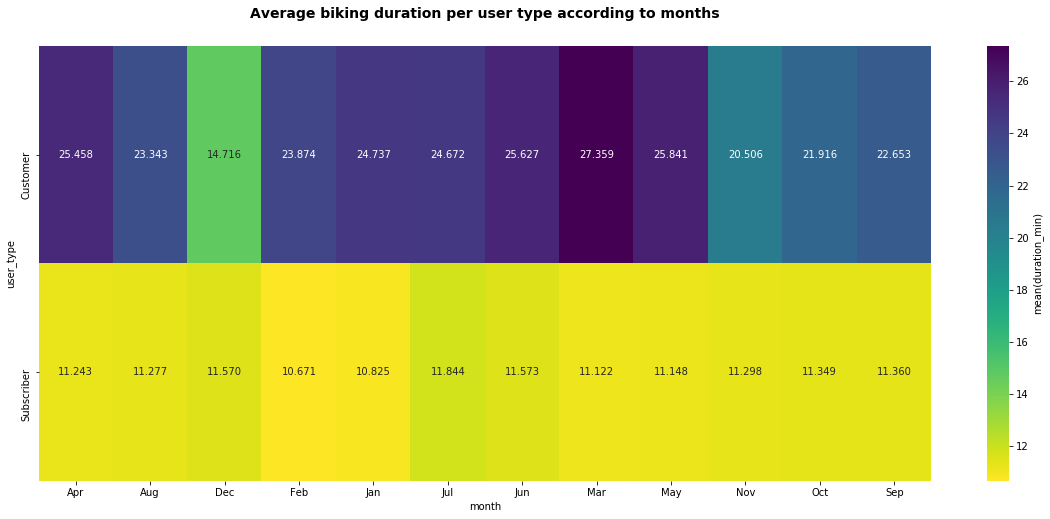

In [219]:
plt.figure (figsize=(20, 8))
cat_means = df.groupby(['month', 'user_type']).mean()['duration_min']
cat_means = cat_means.reset_index(name = 'duration_avg')
cat_means = cat_means.pivot(index = 'user_type', columns = 'month',
                            values = 'duration_avg')
plt.title("Average biking duration per user type according to months", y=1.05, fontsize=14, fontweight='semibold')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_min)'}, cmap = 'viridis_r')

In [223]:
# we know that there are mnay outliers in the duration minute column, so to get a better results, lets take
# data which is in within quantile range of 0.01 and 0.99
q_low = df["duration_min"].quantile(0.01)
q_hi  = df["duration_min"].quantile(0.99)

df_filtered = df[(df["duration_min"] < q_hi) & (df["duration_min"] > q_low)]

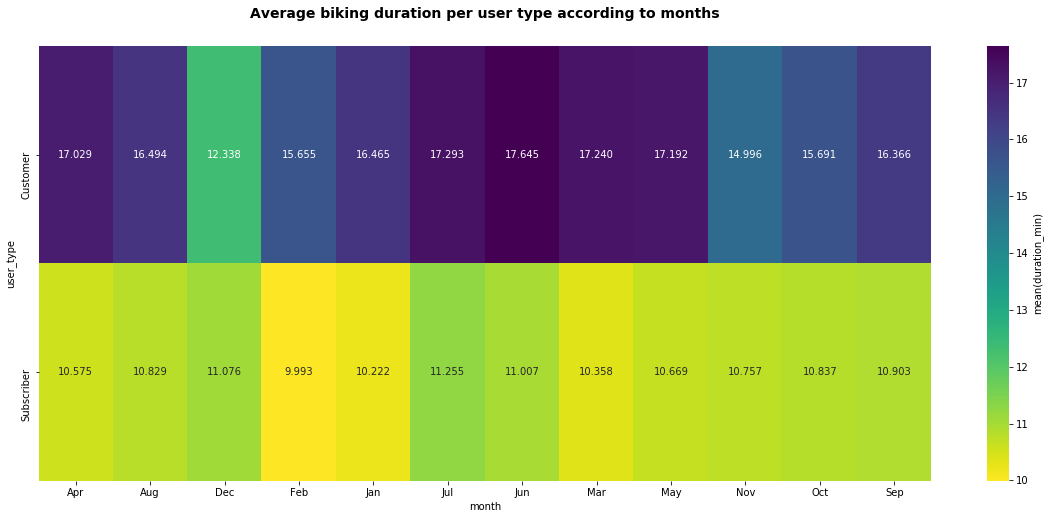

In [224]:
# now lets make above heat map again with filtered data
plt.figure (figsize=(20, 8))
cat_means = df_filtered.groupby(['month', 'user_type']).mean()['duration_min']
cat_means = cat_means.reset_index(name = 'duration_avg')
cat_means = cat_means.pivot(index = 'user_type', columns = 'month',
                            values = 'duration_avg')
plt.title("Average biking duration per user type according to months", y=1.05, fontsize=14, fontweight='semibold')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_min)'}, cmap = 'viridis_r')

#### It can be seen that average biking time for subscribers is highst in july (11.255) while the same is highest for cutomers 
#### in jun (17.645). For subscribers the lowest time is in Feb, while for customers it is December.

## 2 Lets check bike rides duration according to users and day of week.

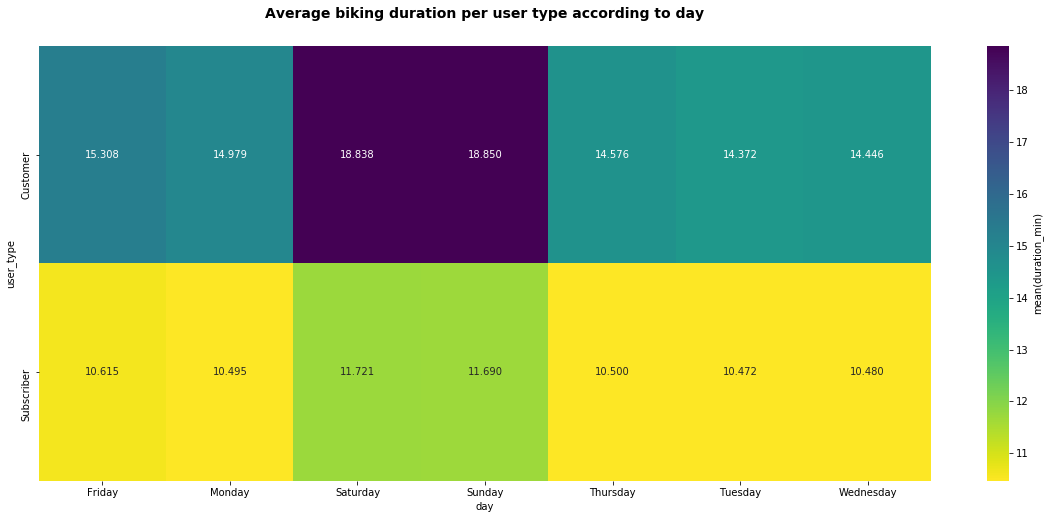

In [225]:
plt.figure (figsize=(20, 8))
cat_means = df_filtered.groupby(['day', 'user_type']).mean()['duration_min']
cat_means = cat_means.reset_index(name = 'duration_avg')
cat_means = cat_means.pivot(index = 'user_type', columns = 'day',
                            values = 'duration_avg')
plt.title("Average biking duration per user type according to day", y=1.05, fontsize=14, fontweight='semibold')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_min)'}, cmap = 'viridis_r')

#### Here the difference is not that remarlkable, as for both subscribers and customers, the highest use is on weekends.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
In multivariate analysis, I checked the types of user, bike duration and month/ days of the year. For this first groupby function was used to group data according to month and user OR day and user, and then it was reshaped for seaborn. What I found was that the ride duration is alsmot same for subscribers in both cases, but for customers, it was very low in December. In case of days, the duration was very high for customers on weekends, while for subscribers, it did not make any huge difference. 

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Yes, when exploring data, it was found that there were few outliers, so they were removed using quantile function.